<a href="https://colab.research.google.com/github/ArifAygun/ML_Calisma_Notebooklari/blob/main/Analysis_Freedom_Debt_Relief_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS OF FREEDOM DEPT RELIEF COMPANY**
# **REVIEWS IN TRUSTPILOT WEBSITE**

In [20]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from transformers import BertTokenizer

import torch
from torch.utils.data import  random_split, DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Freedom Debt Relief/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Freedom Debt Relief


In [22]:
# Get the current working directory
current_dir = os.getcwd()

# Specify the full path to the CSV file
file_path = os.path.join(current_dir, 'Freedom_Debt_Relief3.csv')

# Read the CSV file
df = pd.read_csv(file_path)


In [23]:
df= pd.read_csv('Freedom_Debt_Relief3.csv')

In [24]:
# Drop rows with null values in the 'Cleaned_Concatenated_Text' column
df = df.dropna(subset=['Cleaned_Concatenated_Text'])
# Display information after dropping null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33452 entries, 0 to 33453
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Reviewer Name              33452 non-null  object
 1   Reviews Count              33452 non-null  int64 
 2   Country Code               33452 non-null  object
 3   Experience Date            33452 non-null  object
 4   Rating                     33452 non-null  int64 
 5   Review Date                33452 non-null  object
 6   Review Title               33452 non-null  object
 7   Review Text                33452 non-null  object
 8   Reply Date                 31899 non-null  object
 9   Reply Text                 32133 non-null  object
 10  Country Name               33452 non-null  object
 11  Year                       33452 non-null  int64 
 12  Review Year                33452 non-null  int64 
 13  Review Response            33452 non-null  object
 14  Reply 

In [25]:
df.head()

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text,...,Review Response,Reply Response,Month,Day,Weekday,Concatenated_Text,Cleaned_Concatenated_Text,Text_Item_Count,Sentiment_Scores,Sentiment_Label
0,Freida Towe,1,US,2019-12-04,5,2019-12-04,Very polite and kind,Very polite and kind. Did what I asked immedia...,2019-12-04,"Thank you very much, Freida! We truly care abo...",...,0 days,0 days,12,4,Wednesday,Very polite and kind Very polite and kind. Did...,polite kind polite kind asked immediately,6,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...",Positive
1,Jabrea Herron,1,US,2019-12-04,5,2019-12-04,Great customer service,There wasn't a long wait time . The representa...,2019-12-05,"Jabrea, We are so happy to hear that you are h...",...,0 days,1 days,12,4,Wednesday,Great customer service There wasn't a long wai...,great customer service long wait time represen...,20,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",Positive
2,William Lutz,2,US,2019-12-04,5,2019-12-04,Needed an answer to a question…,Needed an answer to a question concerning a pa...,2019-12-04,"Hello William, thank you for sharing your expe...",...,0 days,0 days,12,4,Wednesday,Needed an answer to a question… Needed an answ...,needed answer needed answer question concernin...,17,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...",Positive
3,John Novotny,1,US,2019-12-04,5,2019-12-04,i had a question,I got my answer right away . very professional.,2019-12-04,"John, thank you for your review. We strive to ...",...,0 days,0 days,12,4,Wednesday,i had a question I got my answer right away . ...,question got answer right away professional,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,Maria S,1,US,2019-12-04,1,2019-12-04,This company charges outrageous…,This company charges outrageous settlement fee...,2019-12-04,"We apologize, Ms. Maria, for any frustrations ...",...,0 days,0 days,12,4,Wednesday,This company charges outrageous… This company ...,company charge company charge outrageous settl...,73,"{'neg': 0.229, 'neu': 0.71, 'pos': 0.061, 'com...",Negative


In [31]:
# Display the first few rows of the original DataFrame
print("Original DataFrame (df):")
print(df.head())

# Create a new DataFrame for the year 2018
df_year = df[df['Year'] == 2023].copy()

# Reset index for the new DataFrame
df_year.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame
print("\nDataFrame for the year 2018 (df_2018):")
print(df_year.head())

# Verify that the original DataFrame is still the same
print("\nOriginal DataFrame (df) after operation:")
print(df.head())


Original DataFrame (df):
   Reviewer Name  Reviews Count Country Code Experience Date  Rating  \
0    Freida Towe              1           US      2019-12-04       5   
1  Jabrea Herron              1           US      2019-12-04       5   
2   William Lutz              2           US      2019-12-04       5   
3   John Novotny              1           US      2019-12-04       5   
4        Maria S              1           US      2019-12-04       1   

  Review Date                      Review Title  \
0  2019-12-04              Very polite and kind   
1  2019-12-04            Great customer service   
2  2019-12-04   Needed an answer to a question…   
3  2019-12-04                  i had a question   
4  2019-12-04  This company charges outrageous…   

                                         Review Text  Reply Date  \
0  Very polite and kind. Did what I asked immedia...  2019-12-04   
1  There wasn't a long wait time . The representa...  2019-12-05   
2  Needed an answer to a questi

In [32]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Reviewer Name              2375 non-null   object
 1   Reviews Count              2375 non-null   int64 
 2   Country Code               2375 non-null   object
 3   Experience Date            2375 non-null   object
 4   Rating                     2375 non-null   int64 
 5   Review Date                2375 non-null   object
 6   Review Title               2375 non-null   object
 7   Review Text                2375 non-null   object
 8   Reply Date                 2345 non-null   object
 9   Reply Text                 2375 non-null   object
 10  Country Name               2375 non-null   object
 11  Year                       2375 non-null   int64 
 12  Review Year                2375 non-null   int64 
 13  Review Response            2375 non-null   object
 14  Reply Re

# Deep Learning Model (BERT)

## Loading Pre-trained BERT Tokenizer and Model:

In [33]:
# Load the pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load the pre-trained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Adjust num_labels based on your sentiment classes


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Tokenizing and Preprocessing:

In [34]:
max_seq_length = 128

# Tokenize and preprocess the text data
encoded_texts = tokenizer(list(df_year['Cleaned_Concatenated_Text']), padding=True, truncation=True, max_length=max_seq_length, return_tensors='pt')


## Preparing Labels:

In [36]:
# Assuming you have 'Sentiment_Label' as your target variable
labels = torch.tensor(df_year['Sentiment_Label'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2}), dtype=torch.long)


## Splitting Data and Creating Data Loaders:

In [37]:
# Combine input_ids and attention_mask into a single tensor
input_tensor = torch.cat((encoded_texts['input_ids'].unsqueeze(2), encoded_texts['attention_mask'].unsqueeze(2)), dim=2)

# Create a TensorDataset
dataset = TensorDataset(input_tensor, labels)

# Define the sizes for training and validation sets
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size

# Split the dataset
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

# Create DataLoader for training and validation
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


## Defining Optimizer and Criterion:

In [38]:
# Define optimizer and criterion
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()


## Training the Model:

In [39]:
for batch in train_loader:
    print(batch)
    break  # Stop after printing the first batch to inspect its structure


[tensor([[[  101,     1],
         [ 2194,     1],
         [ 4196,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,     0]],

        [[  101,     1],
         [ 2518,     1],
         [ 3407,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,     0]],

        [[  101,     1],
         [ 2521,     1],
         [ 2204,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,     0]],

        ...,

        [[  101,     1],
         [ 2081,     1],
         [ 2514,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,     0]],

        [[  101,     1],
         [ 4923,     1],
         [ 4003,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,     0]],

        [[  101,     1],
         [10591,     1],
         [ 7016,     1],
         ...,
         [    0,     0],
         [    0,     0],
         [    0,

The provided information is the training progress of a neural network model for one epoch. Let's break down and discuss the key components:

1. **Epochs:** The training process is organized into epochs. In this case, there are three epochs (`num_epochs = 3`). Each epoch represents one complete pass through the entire training dataset.

2. **Batches:** The training dataset is divided into batches to facilitate efficient model training. Each batch is a subset of the dataset, and the model updates its weights based on the loss calculated for each batch. In this example, there are 424 batches in each epoch.

3. **Loss:** The loss is a measure of how well the model is performing. It represents the difference between the predicted values and the actual target values. Lower loss values indicate better model performance. In your example, the loss is printed after each batch.

   - For example, in the first batch of the first epoch, the loss is 0.5457.
   - In the second batch, the loss decreases to 0.4940.
   - The loss values continue to fluctuate as the model learns from different batches.

4. **Average Loss:** After each epoch, the average loss is calculated by dividing the total accumulated loss by the number of batches. The average loss provides an overall measure of how well the model is performing across the entire epoch.

   - For example, after the first epoch, the average loss is printed as `Average Loss: 0.3697`.

**Interpretation:**
- The initial batches in the first epoch show some variability in loss, which is expected as the model is still learning patterns in the data.
- It's common for the loss to fluctuate during training as the model adjusts its weights to minimize the error.
- The decreasing trend in the average loss across batches suggests that the model is learning and improving its performance.

To further analyze the model's training progress, you may want to monitor how the loss changes across epochs and consider validation metrics on a separate dataset to assess generalization performance. Additionally, you could visualize the training curves to get a clearer picture of the learning process.

////////////////// Epoch [1/3], Batch [310/424], Loss: 0.1414 ////////////

It looks like the training process is progressing, and the model is learning over the epochs. Here are some observations and points to consider:

1. **Loss Trends:**
   - The loss values for each batch are printed, and you can observe how they change over the training process.
   - Generally, the loss tends to decrease as the model learns to make better predictions.

2. **Batch-wise Analysis:**
   - Some batches show relatively high loss (e.g., Batch 6, Batch 11, Batch 61), while others have low loss values (e.g., Batch 20, Batch 42, Batch 294).
   - High variability in batch loss is normal, and it might be influenced by the complexity of the data in each batch.

3. **Epoch-wise Analysis:**
   - The average loss for each epoch is printed, providing an overview of the training progress. It's decreasing, which is a positive sign.

4. **Considerations:**
   - Ensure that the learning rate and other hyperparameters are appropriately tuned. Adjustments may be needed based on the observed training behavior.
   - Monitor the loss on a validation set to check for overfitting. If the training loss continues to decrease while the validation loss starts increasing, it could indicate overfitting.

5. **Visualization:**
   - To get a clearer understanding, consider plotting the training loss over epochs using the code provided earlier. This will give you a visual representation of how the loss changes throughout the training process.

6. **Further Steps:**
   - After training, you can evaluate the model on a separate test dataset to assess its generalization performance.
   - If needed, you can fine-tune hyperparameters or try different optimization strategies to further improve performance.

Overall, the provided information suggests that the model is learning, and it would be beneficial to visualize the training curves for a more comprehensive analysis.

////////////////// Epoch [2/3], Batch [110/424], Loss: 0.1414 ////////////

It seems like you've provided a log of training epochs and batches, including loss values for each batch. This log is commonly seen in the context of training machine learning models, particularly neural networks. Let's break down the information:

1. **Epochs:** An epoch is one complete pass through the entire training dataset. In your log, you have three epochs (`Epoch [1/3]`, `Epoch [2/3]`, and `Epoch [3/3]`), indicating that the training process ran for three complete cycles through your dataset.

2. **Batches:** Training datasets are often too large to process at once, so they are divided into batches. Each batch represents a subset of the training data. In your log, you have batches ranging from `Batch [1/424]` to `Batch [424/424]`.

3. **Loss:** Loss is a measure of how well the model is performing. It represents the error between the predicted output and the actual target. Lower loss values indicate better performance. In your log, you have loss values associated with each batch, such as `Loss: 0.5457` for the first batch of the first epoch.

4. **Model Training:** The model seems to be trained using gradient descent or a similar optimization algorithm. The goal is to minimize the loss by adjusting the model's parameters based on the gradients of the loss with respect to those parameters.

If you have specific questions or if there's something specific you'd like to analyze or discuss in more detail, please let me know!

## Training the Model (with graph):

Epoch [1/3], Batch [1/119], Loss: 1.0698
Epoch [1/3], Batch [2/119], Loss: 0.8635
Epoch [1/3], Batch [3/119], Loss: 0.8621
Epoch [1/3], Batch [4/119], Loss: 0.8288
Epoch [1/3], Batch [5/119], Loss: 0.6228
Epoch [1/3], Batch [6/119], Loss: 0.6946
Epoch [1/3], Batch [7/119], Loss: 0.8442
Epoch [1/3], Batch [8/119], Loss: 0.6558
Epoch [1/3], Batch [9/119], Loss: 0.7454
Epoch [1/3], Batch [10/119], Loss: 0.4490
Epoch [1/3], Batch [11/119], Loss: 0.5196
Epoch [1/3], Batch [12/119], Loss: 0.6283
Epoch [1/3], Batch [13/119], Loss: 0.6266
Epoch [1/3], Batch [14/119], Loss: 0.6430
Epoch [1/3], Batch [15/119], Loss: 0.5882
Epoch [1/3], Batch [16/119], Loss: 0.5020
Epoch [1/3], Batch [17/119], Loss: 0.3398
Epoch [1/3], Batch [18/119], Loss: 0.6397
Epoch [1/3], Batch [19/119], Loss: 0.2025
Epoch [1/3], Batch [20/119], Loss: 0.5789
Epoch [1/3], Batch [21/119], Loss: 0.7016
Epoch [1/3], Batch [22/119], Loss: 0.6257
Epoch [1/3], Batch [23/119], Loss: 0.1595
Epoch [1/3], Batch [24/119], Loss: 0.1610
E

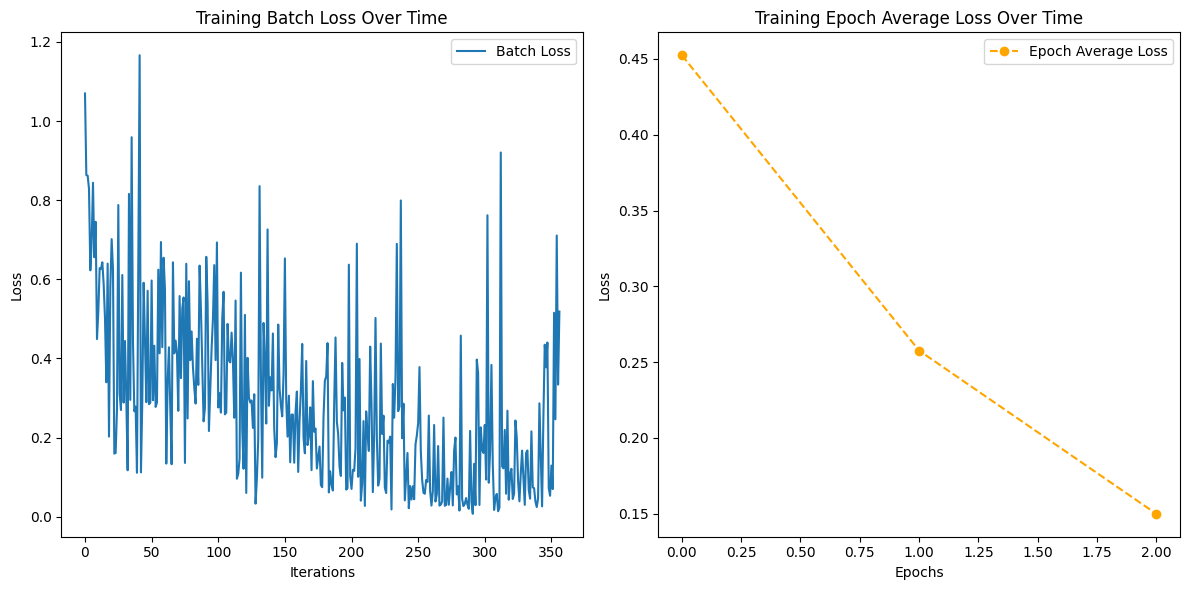

In [40]:
import matplotlib.pyplot as plt

# Lists to store the loss values
epoch_losses = []
batch_losses = []

# Train the model
num_epochs = 3
model.train()

for epoch in range(num_epochs):
    total_loss = 0.0  # Variable to store the total loss for the epoch

    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()

        # Unpack the batch
        inputs, targets = batch

        # Split inputs tensor into input_ids and attention_mask
        input_ids, attention_mask = inputs[:, :, 0], inputs[:, :, 1]

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)[0]

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # Accumulate the loss for the epoch
        batch_losses.append(loss.item())

        # Print loss after each batch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader)
    epoch_losses.append(average_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {average_loss:.4f}')

# Plotting the training loss
plt.figure(figsize=(12, 6))

# Plot batch losses
plt.subplot(1, 2, 1)
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Batch Loss Over Time')
plt.legend()

# Plot epoch average losses
plt.subplot(1, 2, 2)
plt.plot(epoch_losses, label='Epoch Average Loss', linestyle='--', marker='o', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Epoch Average Loss Over Time')
plt.legend()

plt.tight_layout()
plt.show()


2.

## Evaluating the Model:

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        52
           1       0.66      0.85      0.74        34
           2       0.96      0.91      0.93       389

    accuracy                           0.88       475
   macro avg       0.73      0.82      0.77       475
weighted avg       0.90      0.88      0.89       475



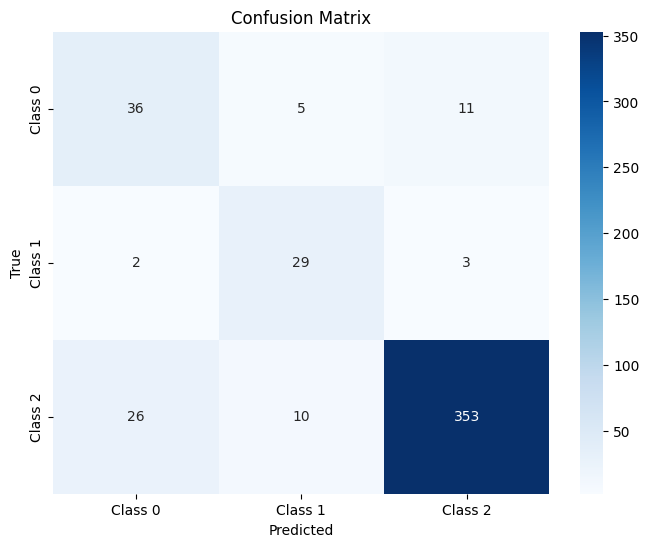

In [52]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


model.eval()
val_predictions = []
val_targets = []

with torch.no_grad():
    for input_batch, target_batch in valid_loader:
        # Assuming the structure of your input_batch is [input_ids, attention_mask]
        # and the structure of your target_batch is [targets]
        input_ids, attention_mask = input_batch[:, :, 0], input_batch[:, :, 1]
        targets = target_batch

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)[0]
        _, predicted_labels = torch.max(outputs, 1)
        val_predictions.extend(predicted_labels.cpu().numpy())
        val_targets.extend(targets.cpu().numpy())

# Print classification report
print(classification_report(val_targets, val_predictions))

# Create a confusion matrix
cm = confusion_matrix(val_targets, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The output you provided is from the classification report, which is a summary of the performance of your classification model. Let's break down the information:

1. **Precision:**
   - Precision is a measure of the accuracy of the classifier when it predicts a positive instance.
   - Precision for Class 0 (the first class) is 0.56. This means that out of all instances predicted as Class 0, 56% were correct.
   - Precision for Class 1 is 0.66, indicating that 66% of instances predicted as Class 1 were correct.
   - Precision for Class 2 is 0.96, indicating a high accuracy of 96% for instances predicted as Class 2.

2. **Recall:**
   - Recall, or sensitivity, is a measure of the ability of the classifier to capture all the positive instances.
   - Recall for Class 0 is 0.69, indicating that the classifier correctly identified 69% of all actual Class 0 instances.
   - Recall for Class 1 is 0.85, suggesting a high recall of 85% for Class 1 instances.
   - Recall for Class 2 is 0.91, indicating that the classifier captured 91% of all actual Class 2 instances.

3. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - F1-score for Class 0 is 0.62.
   - F1-score for Class 1 is 0.74.
   - F1-score for Class 2 is 0.93, indicating a high balance between precision and recall for Class 2.

4. **Support:**
   - Support represents the number of actual occurrences of each class in the specified dataset.
   - There are 52 instances of Class 0, 34 instances of Class 1, and 389 instances of Class 2 in the dataset.

5. **Accuracy:**
   - Accuracy is the overall correctness of the classifier across all classes.
   - The overall accuracy is 88%, indicating that the model correctly predicted the class for 88% of the instances in the validation set.

6. **Macro Avg and Weighted Avg:**
   - Macro Avg calculates the average metric (precision, recall, F1-score) across all classes without considering class imbalance.
   - Weighted Avg considers the number of instances in each class and calculates a weighted average, providing a more accurate representation of overall model performance.

In summary, the classification report provides a comprehensive overview of the model's performance on each class and overall. The model seems to perform well, especially for Class 2, with high precision, recall, and F1-score. However, there is room for improvement in the performance metrics for Class 0 and Class 1.

## Calculating Metrics:

In [61]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated val_targets and val_predictions

# Calculate accuracy and other metrics
accuracy = accuracy_score(val_targets, val_predictions)
f1 = f1_score(val_targets, val_predictions, average='weighted')
classification_rep = classification_report(val_targets, val_predictions)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

# Additional plot for the classification report
report_data = classification_report(val_targets, val_predictions, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()

# Print precision, recall, and f1-score values for each class
for index, row in report_df.iterrows():
    print(f"\nClass {index} - Precision: {row['precision']:.3f}, Recall: {row['recall']:.3f}, F1-Score: {row['f1-score']:.3f}")

# Print accuracy
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8800
F1 Score: 0.8860

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        52
           1       0.66      0.85      0.74        34
           2       0.96      0.91      0.93       389

    accuracy                           0.88       475
   macro avg       0.73      0.82      0.77       475
weighted avg       0.90      0.88      0.89       475


Class 0 - Precision: 0.562, Recall: 0.692, F1-Score: 0.621

Class 1 - Precision: 0.659, Recall: 0.853, F1-Score: 0.744

Class 2 - Precision: 0.962, Recall: 0.907, F1-Score: 0.934

Class accuracy - Precision: 0.880, Recall: 0.880, F1-Score: 0.880

Class macro avg - Precision: 0.728, Recall: 0.818, F1-Score: 0.766

Class weighted avg - Precision: 0.896, Recall: 0.880, F1-Score: 0.886

Accuracy: 0.8800


### Accuracy, F1 Score, and Overall Metrics:
- **Accuracy: 0.8800**: This is the ratio of correctly predicted instances to the total instances. In this case, the model achieved an accuracy of 88%, meaning it correctly classified 88% of the instances in the validation set.

- **F1 Score: 0.8860**: The F1 score is the weighted average of precision and recall. It considers both false positives and false negatives. An F1 score of 0.886 is generally good, indicating a balance between precision and recall.

### Classification Report:
The classification report provides metrics for each class (0, 1, and 2) as well as macro and weighted averages.

#### Class 0:
- **Precision: 0.562**: Out of the instances predicted as class 0, 56.2% were correct.
- **Recall: 0.692**: Out of the instances that are actually class 0, 69.2% were correctly predicted.
- **F1-Score: 0.621**: The harmonic mean of precision and recall. It's a balance between precision and recall.

#### Class 1:
- **Precision: 0.659**: 65.9% of the instances predicted as class 1 were correct.
- **Recall: 0.853**: 85.3% of the instances that are actually class 1 were correctly predicted.
- **F1-Score: 0.744**: A good balance between precision and recall.

#### Class 2:
- **Precision: 0.962**: 96.2% of the instances predicted as class 2 were correct.
- **Recall: 0.907**: 90.7% of the instances that are actually class 2 were correctly predicted.
- **F1-Score: 0.934**: High F1-score, indicating good balance.

#### Overall Metrics:
- **Accuracy (Class accuracy): 0.8800**: The accuracy calculated considering each class separately.

- **Macro Avg Metrics (Class macro avg)**:
  - **Precision: 0.728**: Average precision across all classes.
  - **Recall: 0.818**: Average recall across all classes.
  - **F1-Score: 0.766**: Average F1-score across all classes.

- **Weighted Avg Metrics (Class weighted avg)**:
  - **Precision: 0.896**: Precision averaged by the support of each class.
  - **Recall: 0.880**: Recall averaged by the support of each class.
  - **F1-Score: 0.886**: F1-score averaged by the support of each class.

### Summary:
- The model performs well, especially for class 2, where it shows high precision, recall, and F1-score.
- Class 0 and Class 1 have lower precision, indicating some misclassifications.
- The overall metrics (macro avg and weighted avg) also indicate good performance with a balanced trade-off between precision and recall.

Remember, the choice of metrics to focus on (precision, recall, F1-score) depends on the specific requirements and characteristics of your problem.